
## Explore Raw Data



In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/nasa_close_approach_2023_2024.csv')
df.tail()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
2549,2024 ST,1,2.460577e+06,2024-Sep-23 02:25,0.000734,0.000732,0.000736,11.692475,11.377799,< 00:01,29.550
2550,2024 SH,2,2.460577e+06,2024-Sep-23 11:16,0.041679,0.041442,0.041917,11.657501,11.652015,00:02,24.674
2551,2020 GE,18,2.460578e+06,2024-Sep-24 04:53,0.004414,0.004414,0.004414,2.219280,1.928197,< 00:01,28.160
2552,2024 RO11,2,2.460578e+06,2024-Sep-24 17:31,0.049234,0.048557,0.049911,19.110369,19.107537,00:04,24.773
2553,2024 SP,1,2.460578e+06,2024-Sep-24 18:34,0.013008,0.012985,0.013031,6.360286,6.327999,00:03,28.770


In [ ]:
def find_date(dataframe):
  temp = dataframe['cd'].str.split(' ')
  temp1 = []
  temp2 = []
  for i in temp:
    temp1.append(i[0])
    temp2.append(i[1])
  dataframe.insert(3, 'Date', temp1)
  dataframe.insert(4, 'Time', temp2)
  name_to_no = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04','May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10',
              'Nov': '11', 'Dec': '12'}
  temp = dataframe['Date'].str.split('-')
  for i in temp:
    i[1] = name_to_no[i[1]]
  dataframe['Date'] = temp.str.join('-')
  dataframe['Date'] = pd.to_datetime(dataframe['Date']).dt.date
  dataframe['Time'] = pd.to_datetime(dataframe['Time'], format = '%H:%M').dt.time

In [ ]:
find_date(df)

We will be using the NASA JPL [API](https://ssd-api.jpl.nasa.gov/doc/cad.html) for fetching data about the NEOs which have been found by JPL.

In [ ]:
last_date = str(df['Date'].iloc[-1]) + '_' + str(df['Time'].iloc[-1])
url = 'https://ssd-api.jpl.nasa.gov/cad.api?date-min='+str(last_date)
result = requests.get(url)
information = result.json()

In [ ]:
df1 = pd.DataFrame(columns = information['fields'], data = information['data'])
df1.head()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2024 SY,1,2460578.319195286,2024-Sep-24 19:40,0.0160345720921402,0.01597511209089,0.016094028579573,6.31710046637301,6.29074053625326,00:04,27.90
1,2024 SE3,7,2460578.581500165,2024-Sep-25 01:57,0.00296951630117988,0.00296475421421923,0.00297427814833335,10.6772441665591,10.5928744233017,< 00:01,26.29
2,2024 SG,2,2460578.632987012,2024-Sep-25 03:12,0.00733808880204158,0.00732509266690643,0.00735073285586221,8.86289869988782,8.82183473580502,< 00:01,27.25
3,2024 RK7,6,2460579.000646122,2024-Sep-25 12:01,0.0455693960657534,0.0452905541568575,0.0458482279775336,6.34649225164775,6.33727246434091,< 00:01,25.25
4,2024 SZ2,1,2460579.238700823,2024-Sep-25 17:44,0.0322863714469364,0.032160966491678,0.0324117756021979,14.168403364376,14.1625774848031,< 00:01,25.86


In [ ]:
df1.dtypes

,0
des,object
orbit_id,object
jd,object
cd,object
dist,object
dist_min,object
dist_max,object
v_rel,object
v_inf,object
t_sigma_f,object


In [ ]:
df1[['orbit_id', 'jd', 'dist', 'dist_min', 'dist_max', 'v_rel', 'v_inf', 'h']] = df1[['orbit_id', 'jd', 'dist', 'dist_min', 'dist_max', 'v_rel', 'v_inf', 'h']].astype('float')
find_date(df1)

In [ ]:
df1['jd'] = df1['jd'].astype('float')

In [ ]:
df1.head()

,des,orbit_id,jd,Date,Time,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2024 SY,1.0,2.460578e+06,2024-09-24,19:40:00,2024-Sep-24 19:40,0.016035,0.015975,0.016094,6.317100,6.290741,00:04,27.90
1,2024 SE3,7.0,2.460579e+06,2024-09-25,01:57:00,2024-Sep-25 01:57,0.002970,0.002965,0.002974,10.677244,10.592874,< 00:01,26.29
2,2024 SG,2.0,2.460579e+06,2024-09-25,03:12:00,2024-Sep-25 03:12,0.007338,0.007325,0.007351,8.862899,8.821835,< 00:01,27.25
3,2024 RK7,6.0,2.460579e+06,2024-09-25,12:01:00,2024-Sep-25 12:01,0.045569,0.045291,0.045848,6.346492,6.337272,< 00:01,25.25
4,2024 SZ2,1.0,2.460579e+06,2024-09-25,17:44:00,2024-Sep-25 17:44,0.032286,0.032161,0.032412,14.168403,14.162577,< 00:01,25.86


In [ ]:
df = pd.concat([df, df1], ignore_index = True)

In [ ]:
df.head()

,des,orbit_id,jd,Date,Time,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2022 YS6,6.0,2.459946e+06,2023-01-01,01:15:00,2023-Jan-01 01:15,0.011943,0.011913,0.011973,9.719379,9.696398,< 00:01,26.86
1,2022 YR1,8.0,2.459946e+06,2023-01-01,20:45:00,2023-Jan-01 20:45,0.041749,0.041365,0.042133,6.034629,6.024044,< 00:01,26.04
2,2022 YT3,8.0,2.459947e+06,2023-01-02,00:43:00,2023-Jan-02 00:43,0.028460,0.028384,0.028536,6.438394,6.423836,< 00:01,25.81
3,2022 YU3,5.0,2.459947e+06,2023-01-02,05:11:00,2023-Jan-02 05:11,0.025191,0.025017,0.025365,7.133786,7.118944,< 00:01,25.86
4,2022 YY6,4.0,2.459947e+06,2023-01-02,11:07:00,2023-Jan-02 11:07,0.005439,0.005411,0.005467,20.269551,20.245368,< 00:01,26.15


In [ ]:
df.shape

(3014, 13)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(3014, 13)

In [ ]:
df.drop(['jd'], inplace = True, axis = 1)

In [ ]:
df.head()

,des,orbit_id,Date,Time,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2022 YS6,6.0,2023-01-01,01:15:00,2023-Jan-01 01:15,0.011943,0.011913,0.011973,9.719379,9.696398,< 00:01,26.86
1,2022 YR1,8.0,2023-01-01,20:45:00,2023-Jan-01 20:45,0.041749,0.041365,0.042133,6.034629,6.024044,< 00:01,26.04
2,2022 YT3,8.0,2023-01-02,00:43:00,2023-Jan-02 00:43,0.028460,0.028384,0.028536,6.438394,6.423836,< 00:01,25.81
3,2022 YU3,5.0,2023-01-02,05:11:00,2023-Jan-02 05:11,0.025191,0.025017,0.025365,7.133786,7.118944,< 00:01,25.86
4,2022 YY6,4.0,2023-01-02,11:07:00,2023-Jan-02 11:07,0.005439,0.005411,0.005467,20.269551,20.245368,< 00:01,26.15


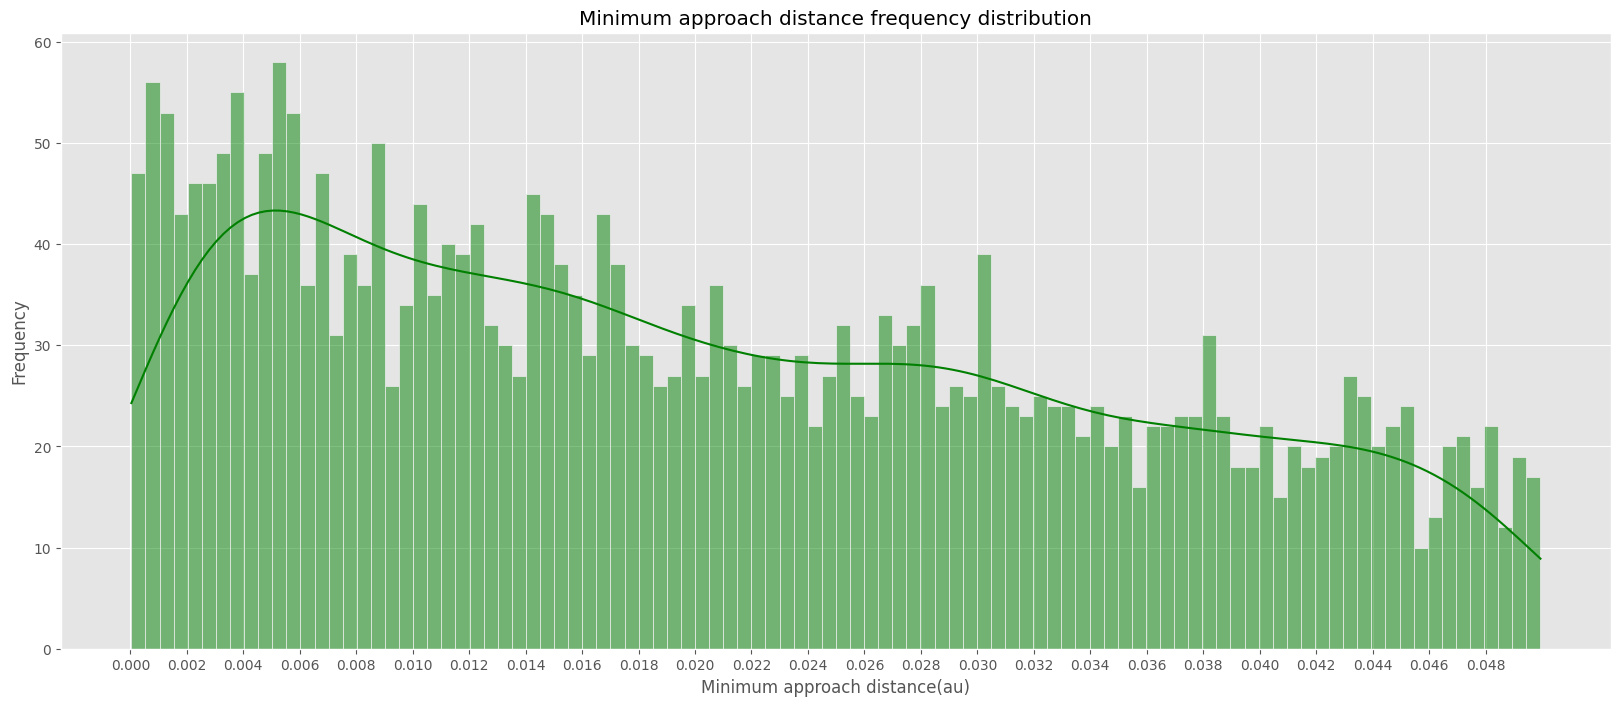

In [ ]:
plt.figure(figsize = (20, 8))
sns.histplot(df['dist_min'], binwidth = 0.0005, kde = True, color = 'green')
plt.xticks(np.arange(0.00, 0.05, 0.002))
plt.title('Minimum approach distance frequency distribution')
plt.xlabel('Minimum approach distance(au)')
plt.ylabel('Frequency')
plt.show()

## Preprocess Pipeline
Handle missing data, normalization, remove outlier and spilt data

In [ ]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 des          0
orbit_id     0
Date         0
Time         0
cd           0
dist         0
dist_min     0
dist_max     0
v_rel        0
v_inf        0
t_sigma_f    0
h            0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Specify numeric features
numeric_features = ['dist', 'dist_min', 'dist_max', 'v_rel', 'v_inf', 'h']

# Create the pipeline for numeric features (only scaling)
numeric_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Split the data
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Apply the preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Get feature names
feature_names = numeric_features + [col for col in df.columns if col not in numeric_features]



In [ ]:
# Convert to DataFrames
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)
X_train_numeric_processed_df = X_train_processed_df[numeric_features].copy()
X_test_numeric_processed_df = X_test_processed_df[numeric_features].copy()

In [ ]:
X_train_processed_df

,dist,dist_min,dist_max,v_rel,v_inf,h,des,orbit_id,Date,Time,cd,t_sigma_f
2581,0.272341,0.269431,0.052318,0.245671,0.251183,0.764922,2024 SD1,1.0,2024-09-27,20:18:00,2024-Sep-27 20:18,< 00:01
1402,0.21645,0.215826,0.041279,0.081483,0.087015,0.753478,2023 VY20,1.0,2023-11-14,05:43:00,2023-Nov-14 05:43,00:01
1216,0.221305,0.220792,0.042179,0.170379,0.1761,0.6806,2023 UF3,2.0,2023-10-18,18:32:00,2023-Oct-18 18:32,00:01
2569,0.210192,0.209934,0.040022,0.233318,0.238748,0.666747,2024 SW3,4.0,2024-09-26,22:09:00,2024-Sep-26 22:09,< 00:01
857,0.466276,0.464226,0.088952,0.437089,0.441476,0.537252,2023 QZ6,4.0,2023-08-27,21:38:00,2023-Aug-27 21:38,< 00:01
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.521842,0.522167,0.099045,0.5169,0.520724,0.412576,2019 KK5,14.0,2024-01-02,21:21:00,2024-Jan-02 21:21,< 00:01
1095,0.313307,0.31302,0.059593,0.196429,0.202275,0.727579,2023 TU,1.0,2023-10-06,03:12:00,2023-Oct-06 03:12,00:05
1130,0.310836,0.310626,0.05911,0.331967,0.336993,0.644462,2023 TZ5,3.0,2023-10-09,17:02:00,2023-Oct-09 17:02,< 00:01
1294,0.520865,0.521125,0.098872,0.464767,0.468971,0.540264,2020 VX,10.0,2023-10-29,01:51:00,2023-Oct-29 01:51,< 00:01


In [ ]:
numeric_stats = X_train_processed_df[numeric_features].agg(['mean', 'std'])
numeric_stats

,dist,dist_min,dist_max,v_rel,v_inf,h
mean,0.422791,0.413814,0.085794,0.254177,0.258618,0.615656
std,0.285305,0.281989,0.073648,0.128847,0.128386,0.107864


In [ ]:
X_train_processed.shape

(2411, 12)

In [ ]:
X_test_processed.shape

(603, 12)

In [ ]:
X_train_numeric_processed_df

,dist,dist_min,dist_max,v_rel,v_inf,h
2581,0.272341,0.269431,0.052318,0.245671,0.251183,0.764922
1402,0.21645,0.215826,0.041279,0.081483,0.087015,0.753478
1216,0.221305,0.220792,0.042179,0.170379,0.1761,0.6806
2569,0.210192,0.209934,0.040022,0.233318,0.238748,0.666747
857,0.466276,0.464226,0.088952,0.437089,0.441476,0.537252
...,...,...,...,...,...,...
1638,0.521842,0.522167,0.099045,0.5169,0.520724,0.412576
1095,0.313307,0.31302,0.059593,0.196429,0.202275,0.727579
1130,0.310836,0.310626,0.05911,0.331967,0.336993,0.644462
1294,0.520865,0.521125,0.098872,0.464767,0.468971,0.540264


In [ ]:
X_train_numeric_processed_df.shape

(2411, 6)

In [ ]:
# get numeric feature data for cluster training
X_train_numeric_processed = X_train_numeric_processed_df.to_numpy()
X_test_numeric_processed = X_test_numeric_processed_df.to_numpy()

In [ ]:
import numpy as np

def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Create a copy of your DataFrame to avoid modifying the original
X_train_no_outliers = X_train_numeric_processed_df.copy()

# Features to check for outliers
features_to_check = ['dist', 'dist_min', 'dist_max', 'v_rel', 'v_inf', 'h']

# Iterate through features and remove outlier rows
for feature in features_to_check:
    outliers = find_outliers_iqr(X_train_no_outliers[feature])
    X_train_no_outliers = X_train_no_outliers[~X_train_no_outliers[feature].isin(outliers)]

# X_train_no_outliers now contains the data with outliers removed

## EDA
visualize distribution and correlation analysis

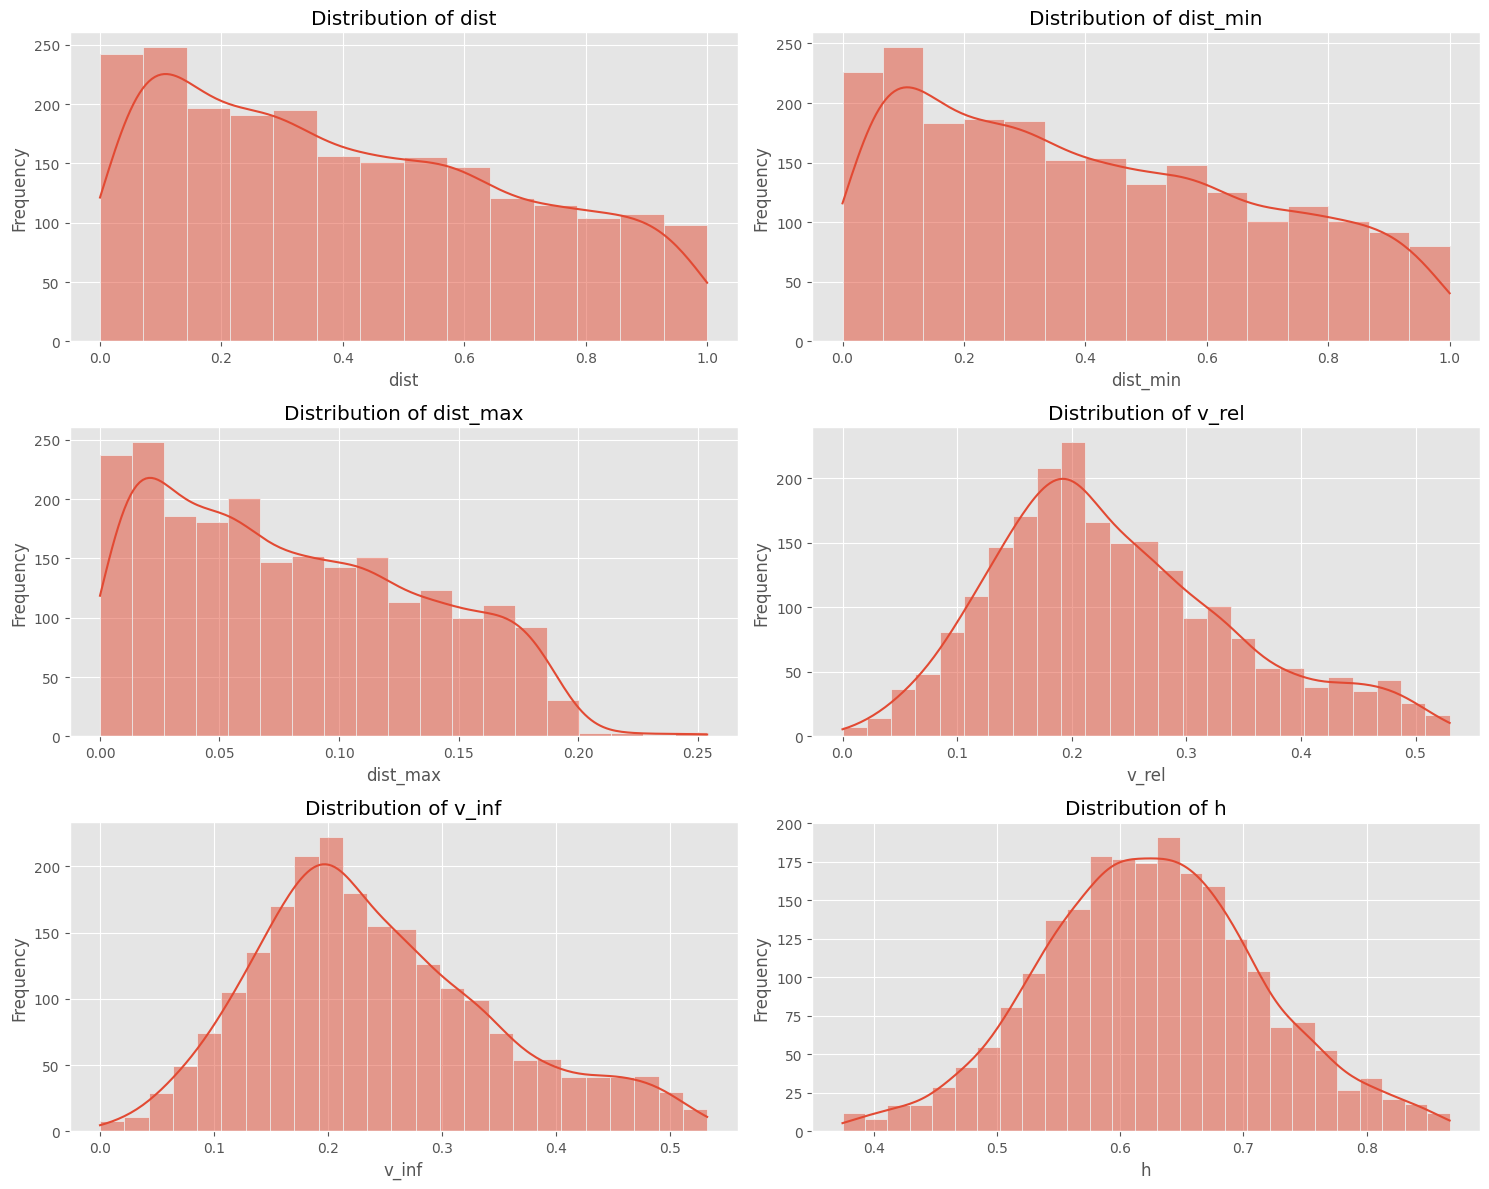

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numeric_features' is your list of numeric features
# and 'X_train_processed' is your preprocessed DataFrame

# Create a 3x3 grid of plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # Adjust figsize as needed

# Iterate through numeric features and plot distributions
for i, feature in enumerate(numeric_features):
    row = i // 2  # Calculate row index
    col = i % 2   # Calculate column index

    sns.histplot(X_train_no_outliers[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust spacing between plots
plt.tight_layout()
plt.show()

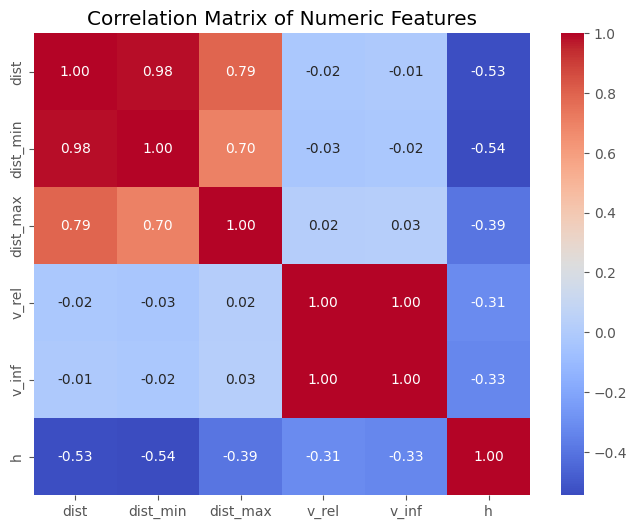

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'numeric_features' is your list of numeric features
# and 'X_train_processed' is your preprocessed DataFrame

# Calculate the correlation matrix
correlation_matrix = X_train_processed_df[numeric_features].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figsize as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Clustering

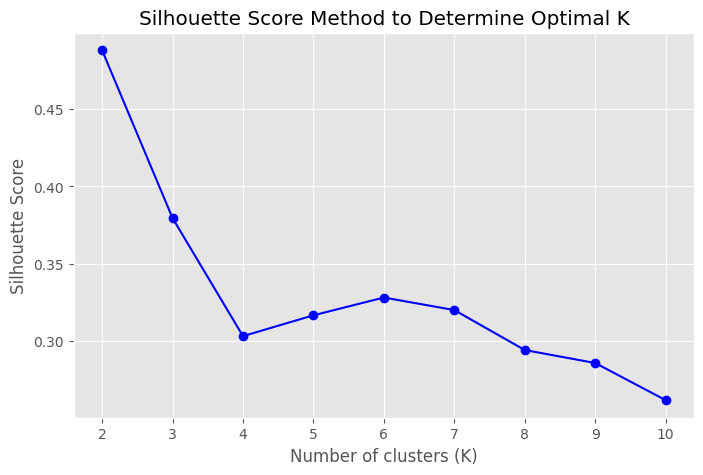

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_numeric_processed)
    score = silhouette_score(X_train_numeric_processed, labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.title('Silhouette Score Method to Determine Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
optimal_k = 2
#optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_numeric_processed)

# Assign cluster labels to the training data
X_train_processed_df['Cluster'] = kmeans.labels_


In [ ]:
X_train_processed_df

,dist,dist_min,dist_max,v_rel,v_inf,h,des,orbit_id,Date,Time,cd,t_sigma_f,Cluster
2581,0.272341,0.269431,0.052318,0.245671,0.251183,0.764922,2024 SD1,1.0,2024-09-27,20:18:00,2024-Sep-27 20:18,< 00:01,1
1402,0.21645,0.215826,0.041279,0.081483,0.087015,0.753478,2023 VY20,1.0,2023-11-14,05:43:00,2023-Nov-14 05:43,00:01,1
1216,0.221305,0.220792,0.042179,0.170379,0.1761,0.6806,2023 UF3,2.0,2023-10-18,18:32:00,2023-Oct-18 18:32,00:01,1
2569,0.210192,0.209934,0.040022,0.233318,0.238748,0.666747,2024 SW3,4.0,2024-09-26,22:09:00,2024-Sep-26 22:09,< 00:01,1
857,0.466276,0.464226,0.088952,0.437089,0.441476,0.537252,2023 QZ6,4.0,2023-08-27,21:38:00,2023-Aug-27 21:38,< 00:01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.521842,0.522167,0.099045,0.5169,0.520724,0.412576,2019 KK5,14.0,2024-01-02,21:21:00,2024-Jan-02 21:21,< 00:01,0
1095,0.313307,0.31302,0.059593,0.196429,0.202275,0.727579,2023 TU,1.0,2023-10-06,03:12:00,2023-Oct-06 03:12,00:05,1
1130,0.310836,0.310626,0.05911,0.331967,0.336993,0.644462,2023 TZ5,3.0,2023-10-09,17:02:00,2023-Oct-09 17:02,< 00:01,1
1294,0.520865,0.521125,0.098872,0.464767,0.468971,0.540264,2020 VX,10.0,2023-10-29,01:51:00,2023-Oct-29 01:51,< 00:01,0


In [ ]:
# Inverse transform to original scale
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame of cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_features)
cluster_centers_df


,dist,dist_min,dist_max,v_rel,v_inf,h
0,0.701786,0.687511,0.142175,0.253876,0.259546,0.558289
1,0.206093,0.201230,0.042001,0.254410,0.257898,0.660215


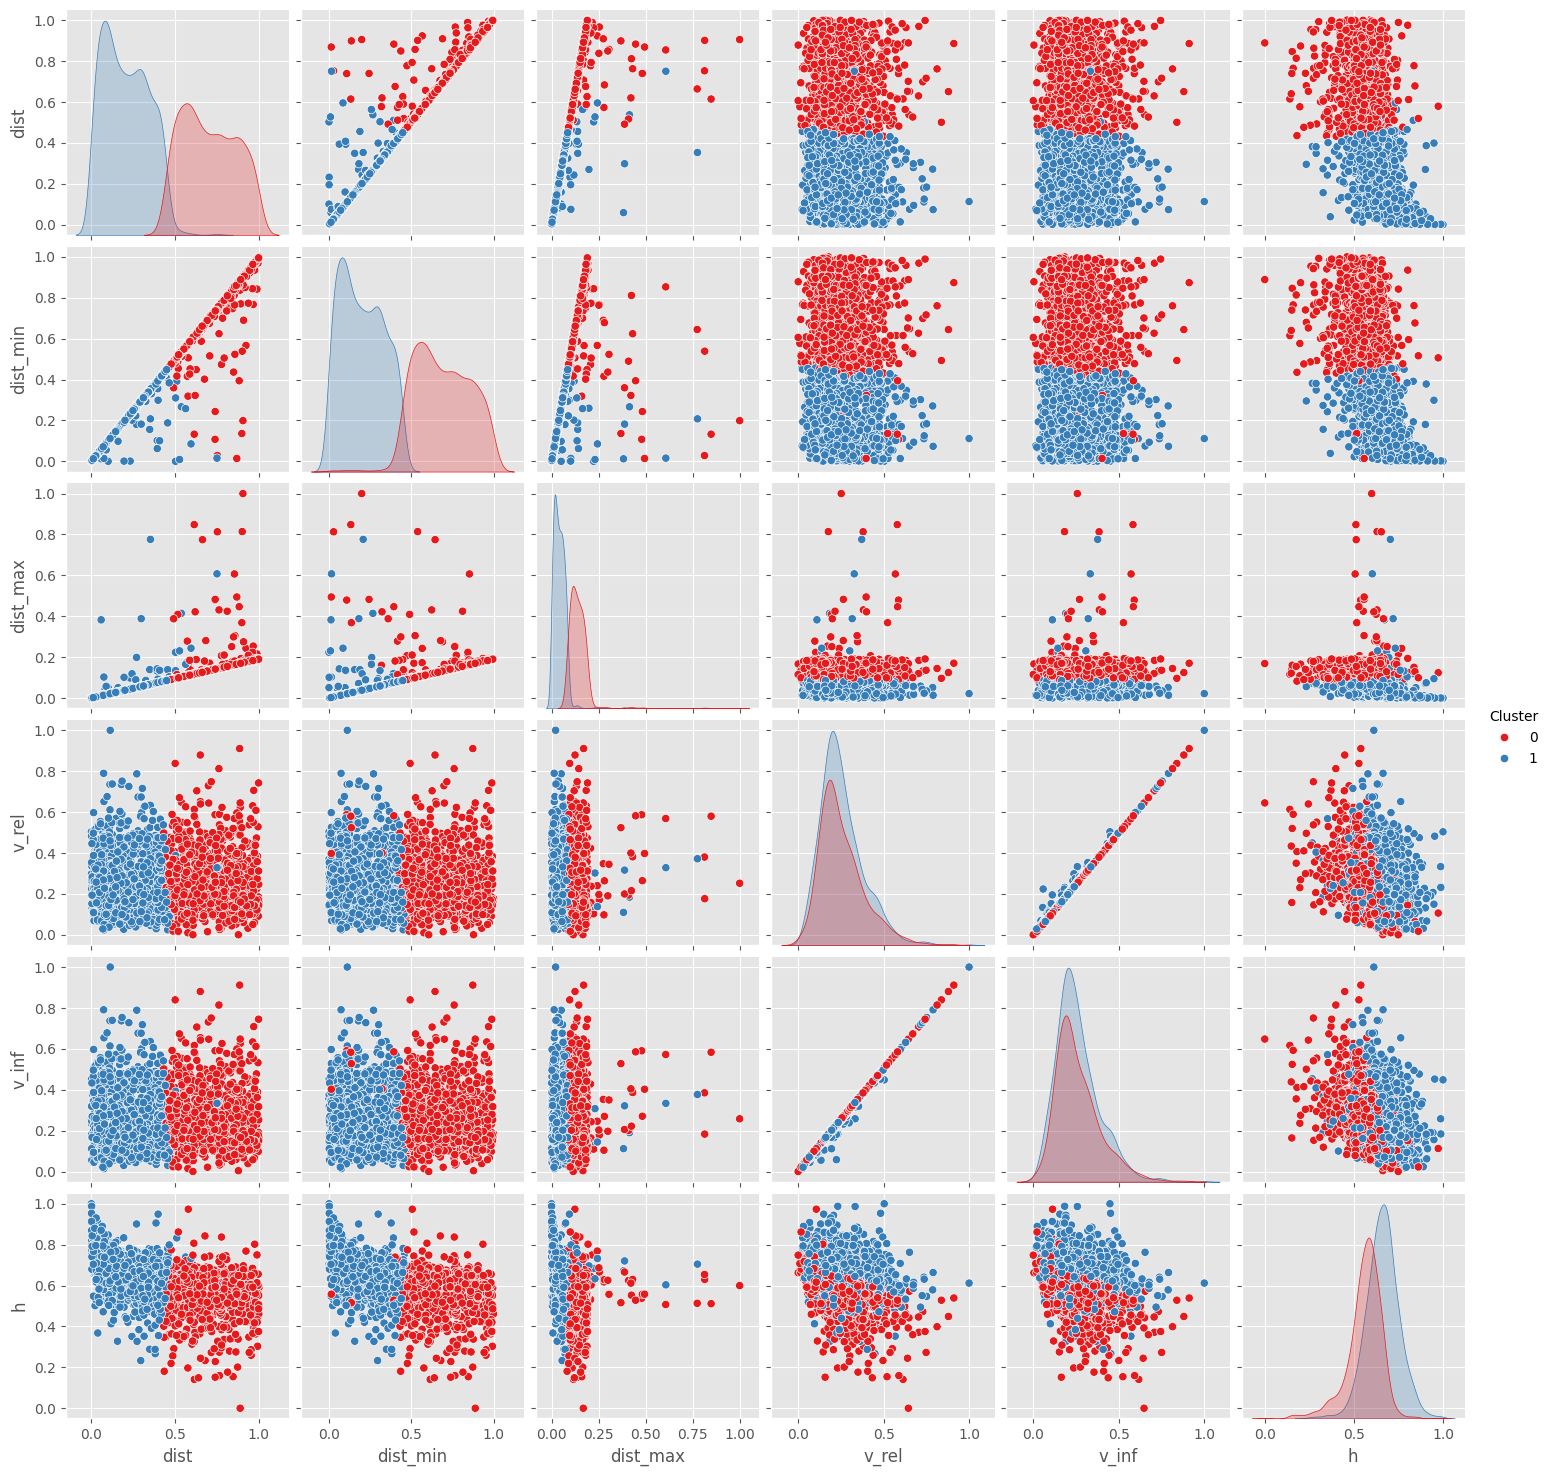

In [ ]:
sns.pairplot(X_train_processed_df, vars=numeric_features, hue='Cluster', palette='Set1')
plt.show()


In [ ]:
labels = kmeans.predict(X_test_numeric_processed)
X_test_processed_df['Cluster'] = labels

In [ ]:
X_test_processed_df

,dist,dist_min,dist_max,v_rel,v_inf,h,des,orbit_id,Date,Time,cd,t_sigma_f,Cluster
291,0.375742,0.373741,0.071765,0.285336,0.290728,0.621574,2023 FR6,1.0,2023-03-20,20:12:00,2023-Mar-20 20:12,00:40,1
2576,0.528916,0.527233,0.100769,0.184608,0.190738,0.726375,2024 SM1,3.0,2024-09-27,11:18:00,2024-Sep-27 11:18,< 00:01,0
1547,0.169805,0.169088,0.032446,0.638492,0.641213,0.652292,2023 XC13,1.0,2023-12-11,00:19:00,2023-Dec-11 00:19,00:04,1
2737,0.23241,0.232339,0.044202,0.142719,0.148543,0.66494,2024 TO4,6.0,2024-10-15,06:55:00,2024-Oct-15 06:55,< 00:01,1
1102,0.390962,0.389873,0.07448,0.239666,0.245361,0.660724,2023 TA6,4.0,2023-10-06,20:54:00,2023-Oct-06 20:54,< 00:01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,0.266521,0.265927,0.050774,0.319472,0.324526,0.600494,2023 DX,2.0,2023-03-03,01:37:00,2023-Mar-03 01:37,00:04,1
1251,0.67808,0.676452,0.129061,0.179335,0.185569,0.57339,2023 TX2,5.0,2023-10-22,12:53:00,2023-Oct-22 12:53,< 00:01,0
2510,0.995742,0.991359,0.189858,0.116709,0.123413,0.606276,2024 RL16,1.0,2024-09-12,07:58:00,2024-Sep-12 07:58,00:03,0
96,0.543636,0.538456,0.104225,0.890091,0.891148,0.543275,2023 CF,2.0,2023-01-29,16:17:00,2023-Jan-29 16:17,< 00:01,0


In [ ]:
data = pd.concat([X_train_processed_df, X_test_processed_df], ignore_index = True)
data = data.drop_duplicates()
data

,dist,dist_min,dist_max,v_rel,v_inf,h,des,orbit_id,Date,Time,cd,t_sigma_f,Cluster
0,0.272341,0.269431,0.052318,0.245671,0.251183,0.764922,2024 SD1,1.0,2024-09-27,20:18:00,2024-Sep-27 20:18,< 00:01,1
1,0.21645,0.215826,0.041279,0.081483,0.087015,0.753478,2023 VY20,1.0,2023-11-14,05:43:00,2023-Nov-14 05:43,00:01,1
2,0.221305,0.220792,0.042179,0.170379,0.1761,0.6806,2023 UF3,2.0,2023-10-18,18:32:00,2023-Oct-18 18:32,00:01,1
3,0.210192,0.209934,0.040022,0.233318,0.238748,0.666747,2024 SW3,4.0,2024-09-26,22:09:00,2024-Sep-26 22:09,< 00:01,1
4,0.466276,0.464226,0.088952,0.437089,0.441476,0.537252,2023 QZ6,4.0,2023-08-27,21:38:00,2023-Aug-27 21:38,< 00:01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,0.266521,0.265927,0.050774,0.319472,0.324526,0.600494,2023 DX,2.0,2023-03-03,01:37:00,2023-Mar-03 01:37,00:04,1
3010,0.67808,0.676452,0.129061,0.179335,0.185569,0.57339,2023 TX2,5.0,2023-10-22,12:53:00,2023-Oct-22 12:53,< 00:01,0
3011,0.995742,0.991359,0.189858,0.116709,0.123413,0.606276,2024 RL16,1.0,2024-09-12,07:58:00,2024-Sep-12 07:58,00:03,0
3012,0.543636,0.538456,0.104225,0.890091,0.891148,0.543275,2023 CF,2.0,2023-01-29,16:17:00,2023-Jan-29 16:17,< 00:01,0


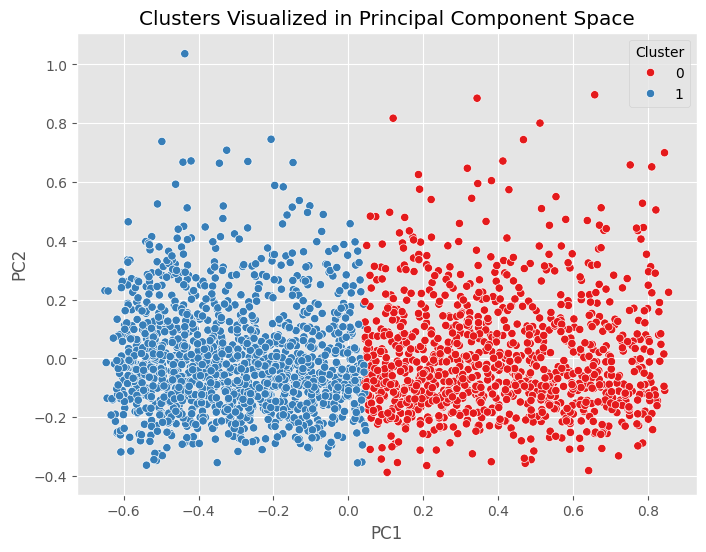

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
components = pca.fit_transform(X_train_numeric_processed)
feature_weights = pca.components_


# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1')
plt.title('Clusters Visualized in Principal Component Space')
plt.show()


In [ ]:
feature_weights

array([[ 0.69698869,  0.68744932,  0.13774745, -0.00490084, -0.00080399,
        -0.15040335],
       [-0.01773105, -0.0294995 ,  0.01032854,  0.68794055,  0.68619616,
        -0.2336265 ]])

In [ ]:
print(pd.DataFrame(feature_weights,columns=X_train_numeric_processed_df.columns,index = ['PC-1','PC-2']))

          dist  dist_min  dist_max     v_rel     v_inf         h
PC-1  0.696989  0.687449  0.137747 -0.004901 -0.000804 -0.150403
PC-2 -0.017731 -0.029500  0.010329  0.687941  0.686196 -0.233626


In [ ]:
# Group by Cluster and compute mean of each feature
cluster_summary = X_train_processed_df.groupby('Cluster')[numeric_features].mean()
cluster_summary


,dist,dist_min,dist_max,v_rel,v_inf,h
Cluster,,,,,,
0,0.70276,0.688436,0.142393,0.254209,0.259877,0.558255
1,0.206798,0.201945,0.042128,0.254152,0.257647,0.659941


# Risk Assessment

Distance: Closer objects could be considered higher risk.

Velocity: Faster objects might pose more impact risk.

Magnitude: Brighter objects (lower magnitude) could indicate larger size and higher risk.

## **Determined using specific thresholds**
>Minimum Orbit Intersection Distance (MOID): This is the closest distance between the asteroid's orbit and Earth's orbit. An asteroid is considered potentially hazardous if its MOID is 0.05 astronomical units (AU) or less.


>Absolute Magnitude (H): This parameter reflects the asteroid's size. Asteroids with an absolute magnitude of 22.0 or greater are considered large enough to cause significant damage in the event of an impact.

Reference from: [NASA gov](https://cneos.jpl.nasa.gov/about/neo_groups.html) [NEO](https://en.wikipedia.org/wiki/Near-Earth_object)

In [ ]:
from datetime import date
l1 = list(df[(df['dist_min'] < 0.05) & (df['h'] >= 22) & (df['Date'] > date.today())]['des'])
df[(df['dist_min'] < 0.05) & (df['h'] >= 22) & (df['Date'] > date.today())]

,des,orbit_id,Date,Time,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
2982,2006 WB,31.0,2024-11-26,18:01:00,2024-Nov-26 18:01,0.005958,0.005958,0.005958,4.203735,4.095962,< 00:01,22.800
2983,2024 WD3,1.0,2024-11-27,03:53:00,2024-Nov-27 03:53,0.011574,0.011540,0.011608,5.361120,5.318005,< 00:01,28.124
2984,2024 WQ2,1.0,2024-11-27,08:01:00,2024-Nov-27 08:01,0.013900,0.013853,0.013948,17.308632,17.297554,00:02,24.580
2985,2024 WF3,1.0,2024-11-28,11:15:00,2024-Nov-28 11:15,0.027802,0.027698,0.027905,6.897005,6.883095,00:03,27.330
2986,2024 WT,5.0,2024-11-28,12:44:00,2024-Nov-28 12:44,0.005982,0.005978,0.005986,3.841737,3.723985,< 00:01,27.099
2987,2018 DC4,2.0,2024-11-29,07:28:00,2024-Nov-29 07:28,0.048082,0.042169,0.058864,4.486259,4.473889,1_03:07,27.300
2988,2024 WZ,2.0,2024-11-29,22:49:00,2024-Nov-29 22:49,0.009674,0.009653,0.009696,9.914152,9.886332,00:04,26.906
2989,2019 JN2,9.0,2024-11-30,07:39:00,2024-Nov-30 07:39,0.023970,0.023420,0.024542,7.713242,7.698817,01:04,25.720
2990,2024 WS,2.0,2024-11-30,15:35:00,2024-Nov-30 15:35,0.015734,0.015635,0.015833,10.519232,10.503121,00:06,26.533
2991,2021 XZ,1.0,2024-12-02,09:14:00,2024-Dec-02 09:14,0.033762,0.020087,0.047621,7.397151,7.386475,1_22:20,28.210


In [ ]:
results = data[(data['des'].isin(l1)) & (data['Cluster'] == 0)].copy()
results

,dist,dist_min,dist_max,v_rel,v_inf,h,des,orbit_id,Date,Time,cd,t_sigma_f,Cluster
76,0.98029,0.973631,0.187358,0.136008,0.142598,0.585918,2024 WB1,2.0,2024-12-05,23:40:00,2024-Dec-05 23:40,00:04,0
92,0.545575,0.545892,0.10355,0.150146,0.156478,0.511353,2012 UK171,51.0,2025-01-11,00:40:00,2025-Jan-11 00:40,< 00:01,0
287,0.861897,0.862121,0.163587,0.262141,0.267869,0.574595,2018 XU3,11.0,2024-12-11,08:27:00,2024-Dec-11 08:27,< 00:01,0
430,0.923007,0.56674,0.242854,0.240064,0.245956,0.768536,2017 YD2,2.0,2024-12-27,22:01:00,2024-Dec-27 22:01,00:16,0
621,0.867303,0.865782,0.164944,0.110588,0.117283,0.535204,2024 UU3,5.0,2024-12-08,20:47:00,2024-Dec-08 20:47,00:03,0
750,0.568944,0.56615,0.172848,0.324864,0.330084,0.386677,2022 CE2,8.0,2025-01-16,20:29:00,2025-Jan-16 20:29,3_21:31,0
780,0.479211,0.468527,0.093127,0.184391,0.190488,0.58905,2019 JN2,9.0,2024-11-30,07:39:00,2024-Nov-30 07:39,01:04,0
845,0.65639,0.587051,0.137818,0.211683,0.217704,0.666145,2020 XY4,8.0,2024-12-19,23:45:00,2024-Dec-19 23:45,04:23,0
928,0.852412,0.811719,0.171423,0.264328,0.270039,0.505933,2023 OS,6.0,2025-01-15,14:50:00,2025-Jan-15 14:50,00:25,0
979,0.962448,0.84417,0.223683,0.102606,0.109373,0.684214,2018 DC4,2.0,2024-11-29,07:28:00,2024-Nov-29 07:28,1_03:07,0


[連結文字](https://)The Hayabusa mission by the Japanese Space Agency explored the NEO Ryugu, which was at an MOID of 0.0006au.
Reference: [Ryugu](https://en.wikipedia.org/wiki/162173_Ryugu), [Hayabusa2](https://en.wikipedia.org/wiki/Hayabusa2)
So any NEO which has an MOID of that or lesser is explorable. This section explores those NEOs.

In [ ]:
df[(df['dist_min'] <= 0.0006) & (df['Date'] > date.today())]

,des,orbit_id,Date,Time,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
2995,2021 WA5,4.0,2024-12-05,00:02:00,2024-Dec-05 00:02,0.025125,0.000035,0.058893,5.919745,5.901804,6_08:03,27.29
3002,2022 YO1,2.0,2024-12-17,15:40:00,2024-Dec-17 15:40,0.005058,0.000036,0.013485,14.333602,14.296800,15:24,30.01


# KNN

In [ ]:
# Suppose based on analysis, we define:
# Cluster 0: Hazardous
# Cluster 1: Non-Hazardous
# Cluster 2: Hazardous

cluster_labels = {
    0: 'Hazardous',
    1: 'Non-Hazardous',
    #2: 'Hazardous'
}

X_train_processed_df['Hazard_Level'] = X_train_processed_df['Cluster'].map(cluster_labels)


In [ ]:
# Features are the numeric features
X_train_knn = X_train_processed_df[numeric_features]

# Labels are the hazard levels
y_train_knn = X_train_processed_df['Hazard_Level']

# Similarly for test data
X_test_numeric_processed_df['Cluster'] = kmeans.predict(X_test_numeric_processed)
X_test_processed_df['Hazard_Level'] = X_test_numeric_processed_df['Cluster'].map(cluster_labels)

X_test_knn = X_test_processed_df[numeric_features]
y_test_knn = X_test_processed_df['Hazard_Level']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the classifier with K neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model
knn.fit(X_train_knn, y_train_knn)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
# Predict on test data
y_pred = knn.predict(X_test_knn)


In [ ]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_knn, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_knn, y_pred))

# Accuracy Score
print("\nAccuracy Score:")
print(accuracy_score(y_test_knn, y_pred))


Confusion Matrix:
[[248   0]
 [  3 352]]

Classification Report:
               precision    recall  f1-score   support

    Hazardous       0.99      1.00      0.99       248
Non-Hazardous       1.00      0.99      1.00       355

     accuracy                           1.00       603
    macro avg       0.99      1.00      0.99       603
 weighted avg       1.00      1.00      1.00       603


Accuracy Score:
0.9950248756218906
